# Optieprijs

In [1]:
from scipy.special import erf
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import brentq
from scipy import integrate
import sys
eps=sys.float_info.epsilon

In [2]:
def N(x):
    return 1/2*(1+erf(x/np.sqrt(2)))

def d(sign,S0, K, r, T, sigma):
    return (np.log(S0/K)+(r+sign*sigma**2/2)*T)/np.sqrt(sigma**2 * T)

def C_BS(S0, K, r, sigma, T):
    return S0*N(d(+1,S0, K, r, T, sigma))-K*np.exp(-r*T)*N(d(-1,S0, K, r, T, sigma))

def P_BS_PC(S0, K, r, sigma, T):
    return K*np.exp(-r*T)-S0+C_BS(S0, K, r, sigma, T)

def P_BS(S0, K, r, sigma, T):
    return -S0*N(-d(+1,S0, K, r, T, sigma))+K*np.exp(-r*T)*N(-d(-1,S0, K, r, T, sigma))

In [3]:
def Bermuda_Stau(Stau, K, r, sigma, T, tau):
    V_T=np.exp(r*(T-tau))*P_BS(Stau, K, r, sigma, T-tau)
    V_tau=max(K-Stau,0)
    payoff= V_T, V_tau, V_T>V_tau, Stau, max([V_T,V_tau])
    return  payoff

In [4]:
def K_BS(X,T,x,t,sigma,r):
    return (1/np.sqrt(2*np.pi*sigma**2*(T-t)))*np.exp(-((X-x-(r-(sigma**2)/2)*(T-t))**2)/(2*sigma**2*(T-t)))

In [5]:
def S_kritisch(K,T,tau,r,sigma):
    
    def find_critic_fsolve(x):
        return Bermuda_Stau(x, K,r, sigma, T, tau)[0]-Bermuda_Stau(x, K,r, sigma, T, tau)[1]

    return brentq(find_critic_fsolve,10**(-12),K)

In [271]:
def Bermuda(S0,K,T,tau,r,sigma):
    
    def d(sign,S0, K, r, T, sigma):
        return (np.log(S0/K)+(r+sign*sigma**2/2)*T)/np.sqrt(sigma**2 * T)

    def K_BS(X,T,x,t):
        return (1/(np.sqrt(2*np.pi*sigma**2*(T-t))))*np.exp(-((X-x-(r-(sigma**2)/2)*(T-t))**2)/(2*sigma**2*(T-t)))

    Sc=S_kritisch(K,T,tau,r,sigma)
    
    def d(T,sign):
        return (np.log(S0/Sc)+(r+sign*(sigma**2)/2)*T)/np.sqrt(sigma**2 * T)
    
    def DB(Delta_T,sign,extra):
        return  (np.log(S0/K)+(r+sign*(sigma**2)/2)*Delta_T + extra)/np.sqrt(sigma**2 * Delta_T)
    
    P1=K*np.exp(-r*tau)*N(-d(tau,-1))-S0*N(-d(tau,+1))
    
    def I2(x_tau):
        return K_BS(x_tau,tau,0,0)*N(-DB(T-tau,-1,2*x_tau))
    
    def I3(x_tau):
        return K_BS(x_tau,tau,0,0)*N(-DB(T-tau,+1,2*x_tau))*np.exp(x_tau)
    
    P2=K*np.exp(-r*T)*integrate.quad(I2,np.log(Sc/S0),np.inf)[0]
    
    P3=-S0*np.exp(-r*tau)*integrate.quad(I3,np.log(Sc/S0),100)[0]
   
    return P1+P2+P3

# Berekeningen

# $\sigma$

In [234]:
S0=np.linspace(0.01, 2,num=100)

In [235]:
K=1
r=0.05
T=10
tau=.5*T

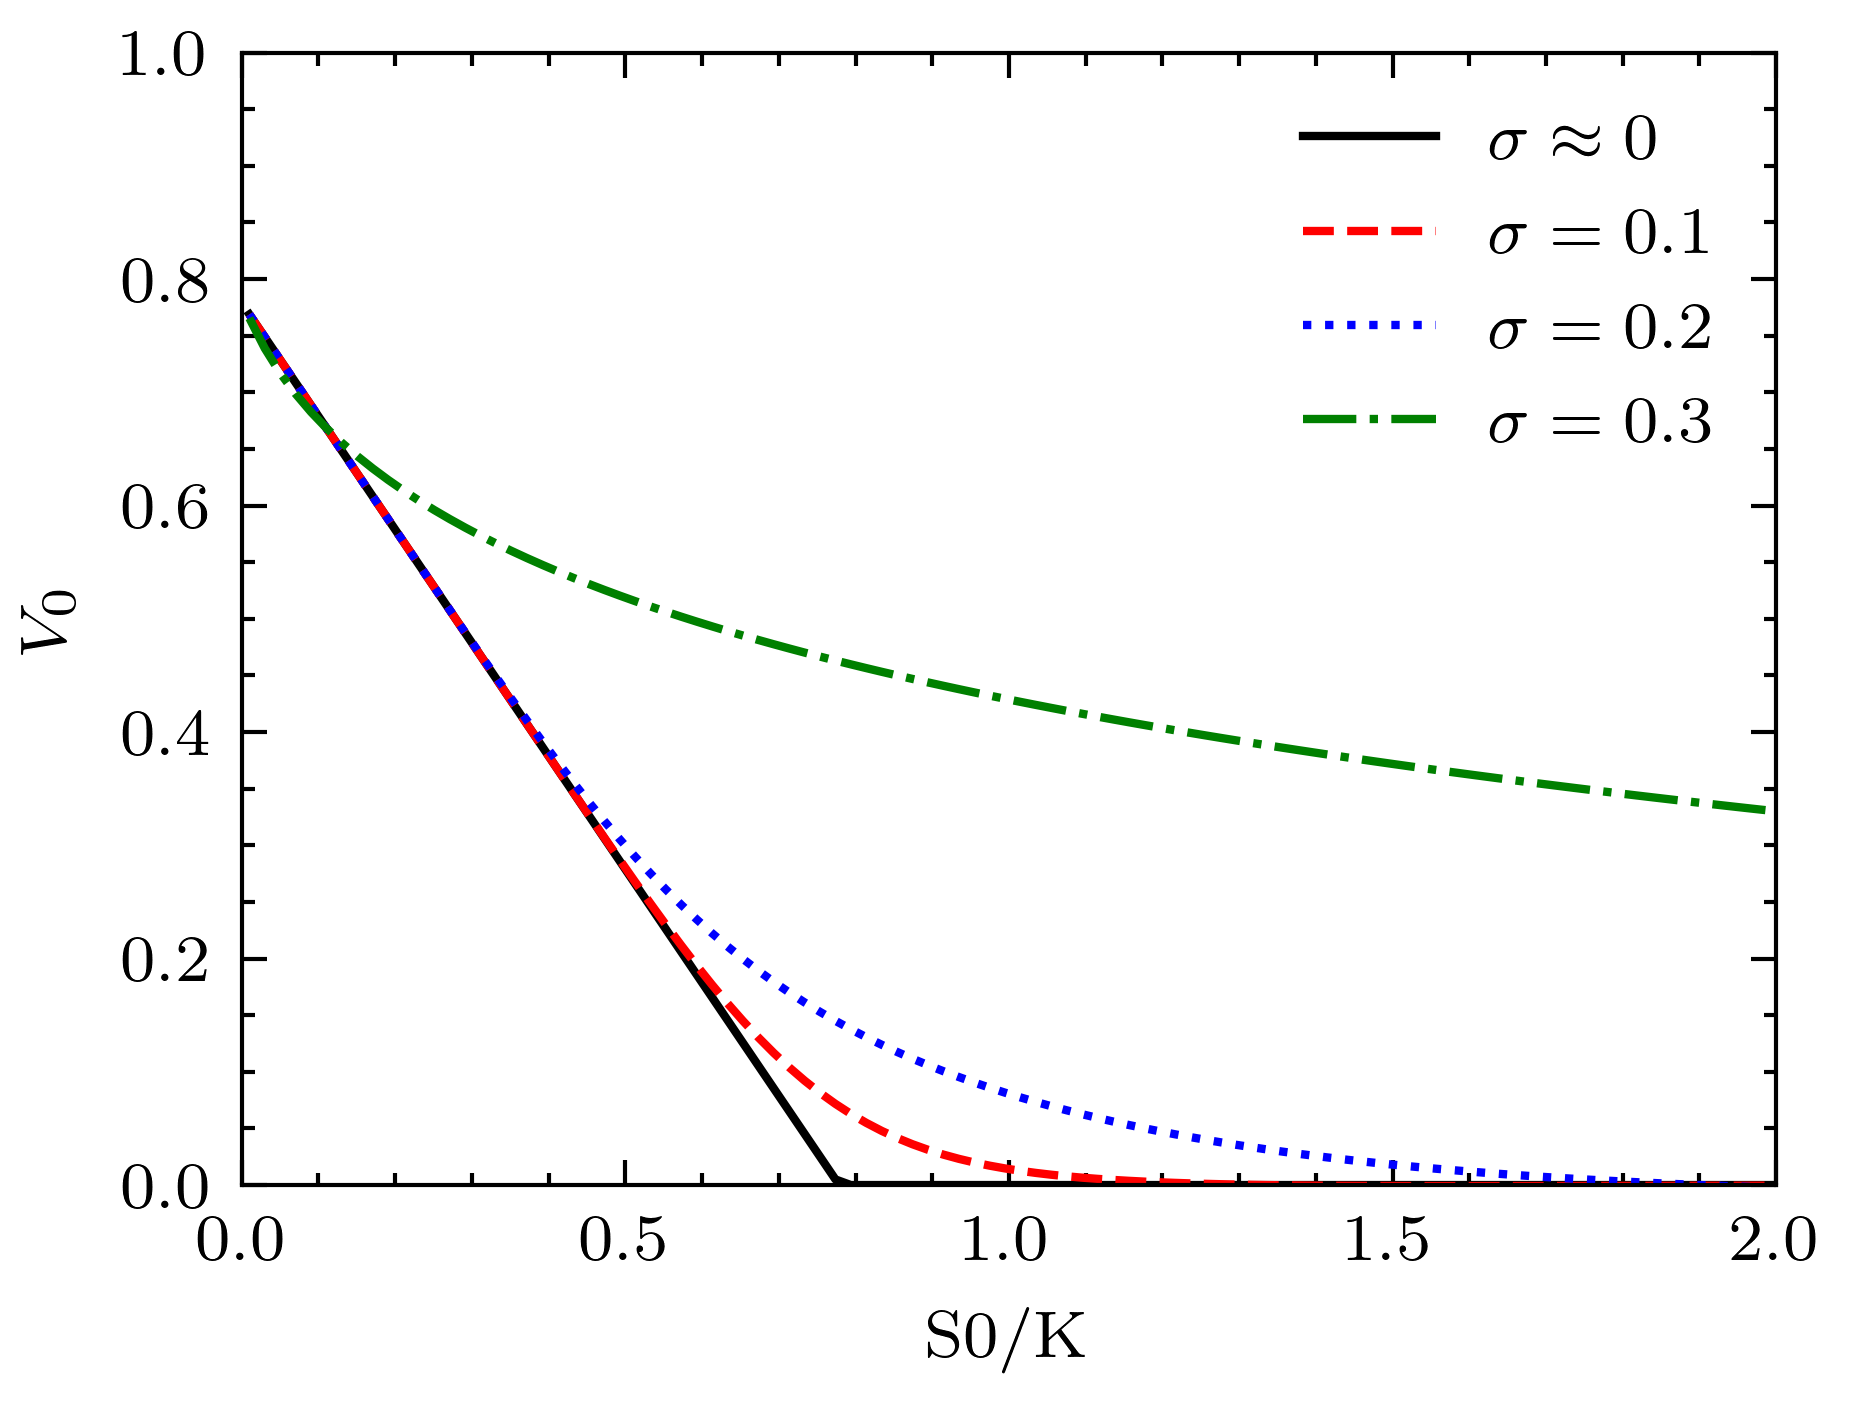

In [237]:
r=0.05
with plt.style.context(['science','ieee']):
    V_0=[]
    for S in S0:
        V_0.append(Bermuda(S,K,T,tau,r,0.001))
    plt.plot(S0,V_0,label=r'$\sigma \approx 0$')

    V_0=[]
    for S in S0:
        V_0.append(Bermuda(S,K,T,tau,r,0.1))
    plt.plot(S0,V_0,label=r'$\sigma = 0.1$')

    V_0=[]
    for S in S0:
        V_0.append(Bermuda(S,K,T,tau,r,0.2))
    plt.plot(S0,V_0,label=r'$\sigma = 0.2$')

    V_0=[]
    for S in S0:
        V_0.append(Bermuda(S,K,T,tau,r,0.7))
    plt.plot(S0,V_0,label=r'$\sigma = 0.3$')
    
    
    plt.ylim([0, 1])
    plt.xlim([0, 2])
    plt.ylabel('$V_0$')
    plt.xlabel('S0/K')
    plt.legend()
    plt.savefig('sigma.png')
    plt.show()

# $r$

In [238]:
S0=np.linspace(0.01, 2,num=100)
K=1
sigma=0.05
T=10
tau=.5*T

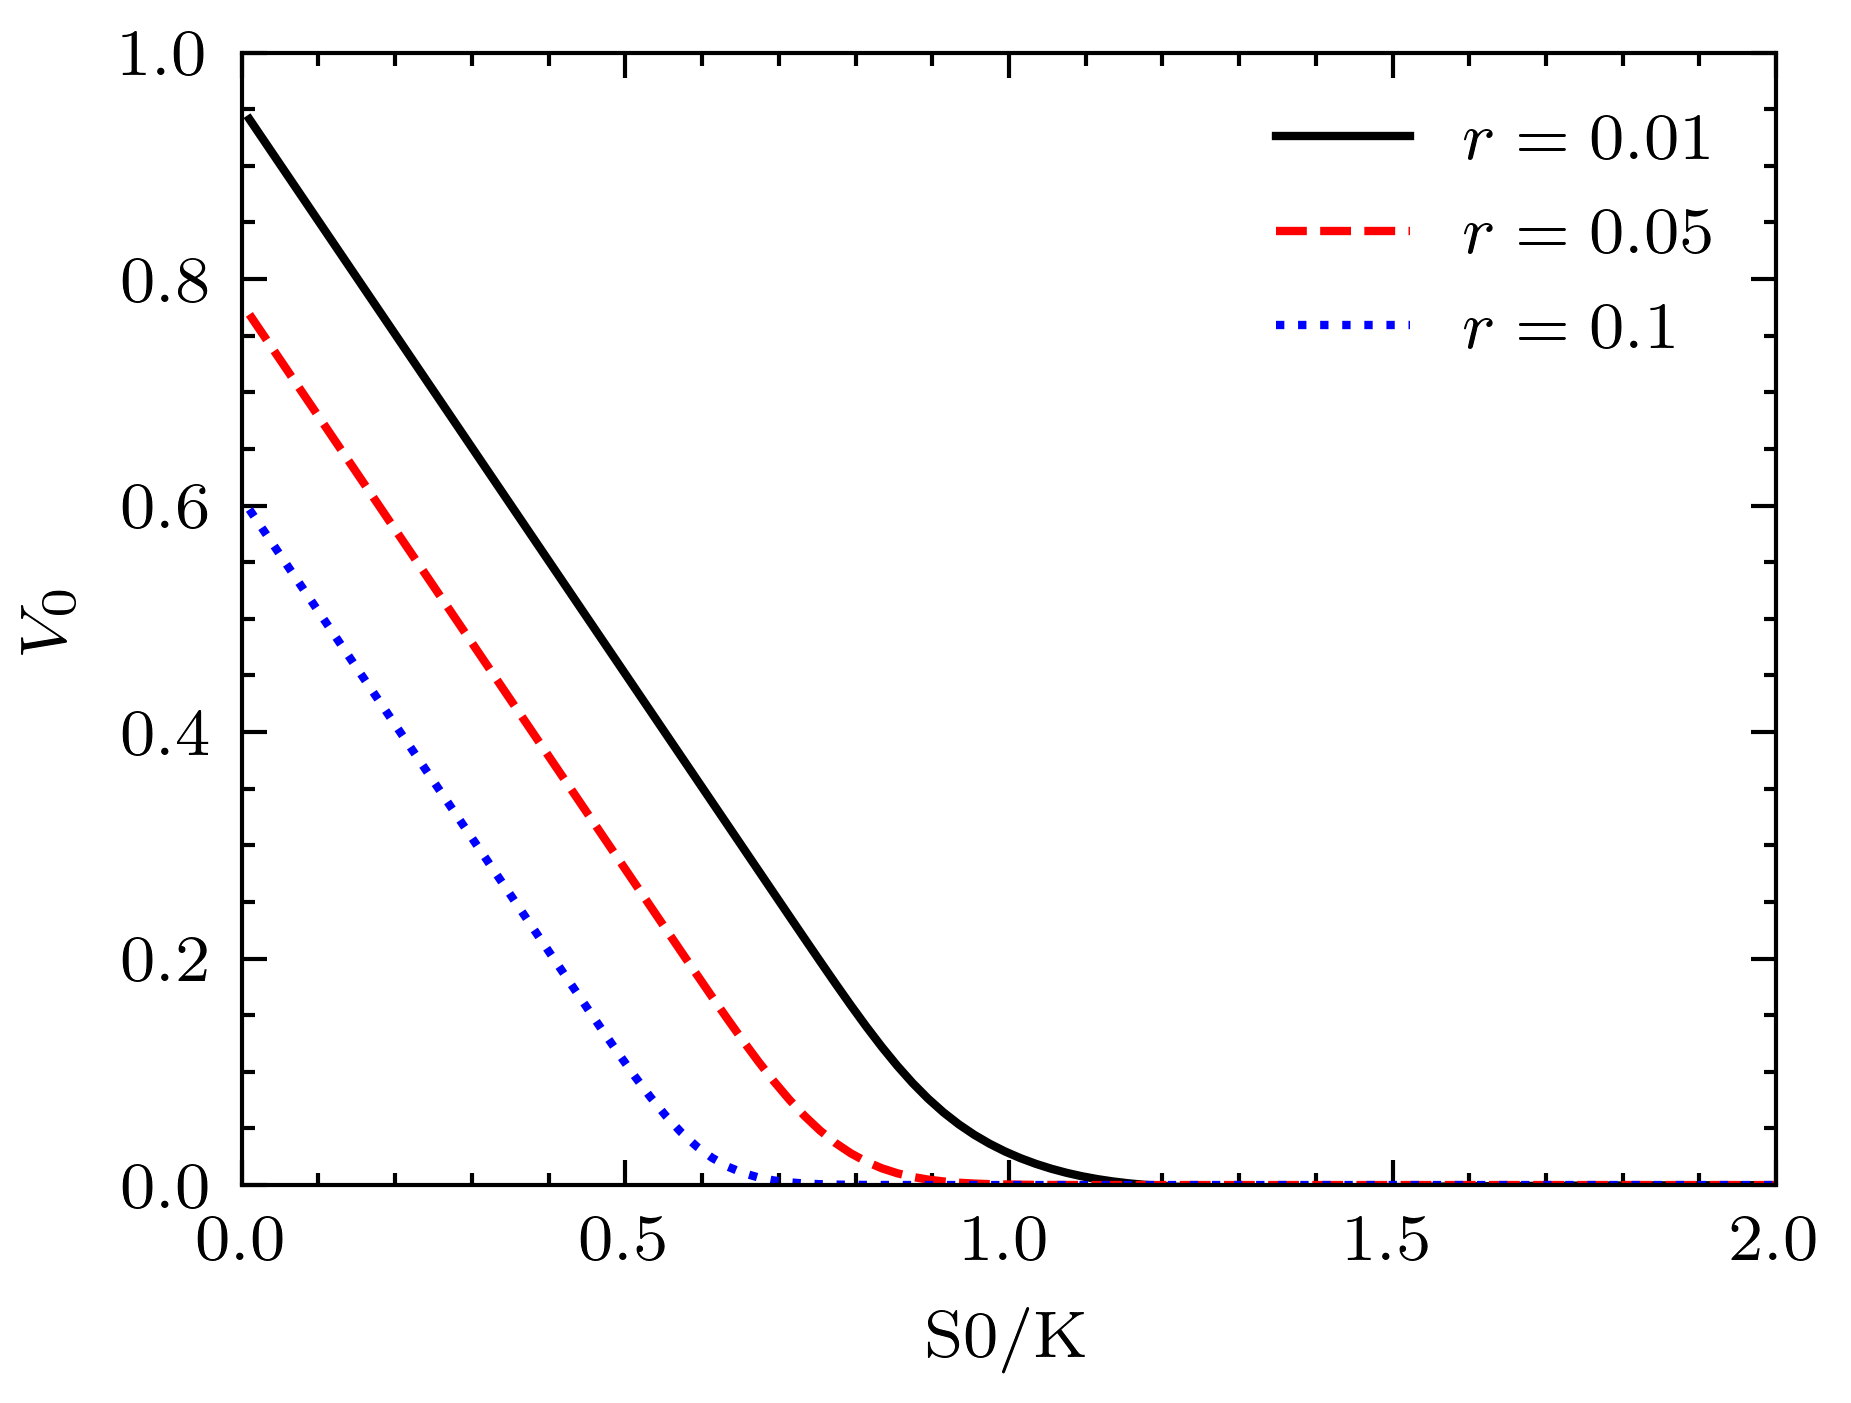

In [239]:
with plt.style.context(['science','ieee']):

    V_0=[]
    for S in S0:
        V_0.append(Bermuda(S,K,T,tau,0.01,sigma))
    plt.plot(S0,V_0,label=r'$r = 0.01$')

    V_0=[]
    for S in S0:
        V_0.append(Bermuda(S,K,T,tau,0.05,sigma))
    plt.plot(S0,V_0,label=r'$r = 0.05$')

    V_0=[]
    for S in S0:
        V_0.append(Bermuda(S,K,T,tau,0.1,sigma))
    plt.plot(S0,V_0,label=r'$r = 0.1$')

    plt.ylim([0, 1])
    plt.xlim([0, 2])
    plt.ylabel('$V_0$')
    plt.xlabel('S0/K')
    plt.legend()
    plt.savefig('r.png')
    plt.show()

# $\tau$

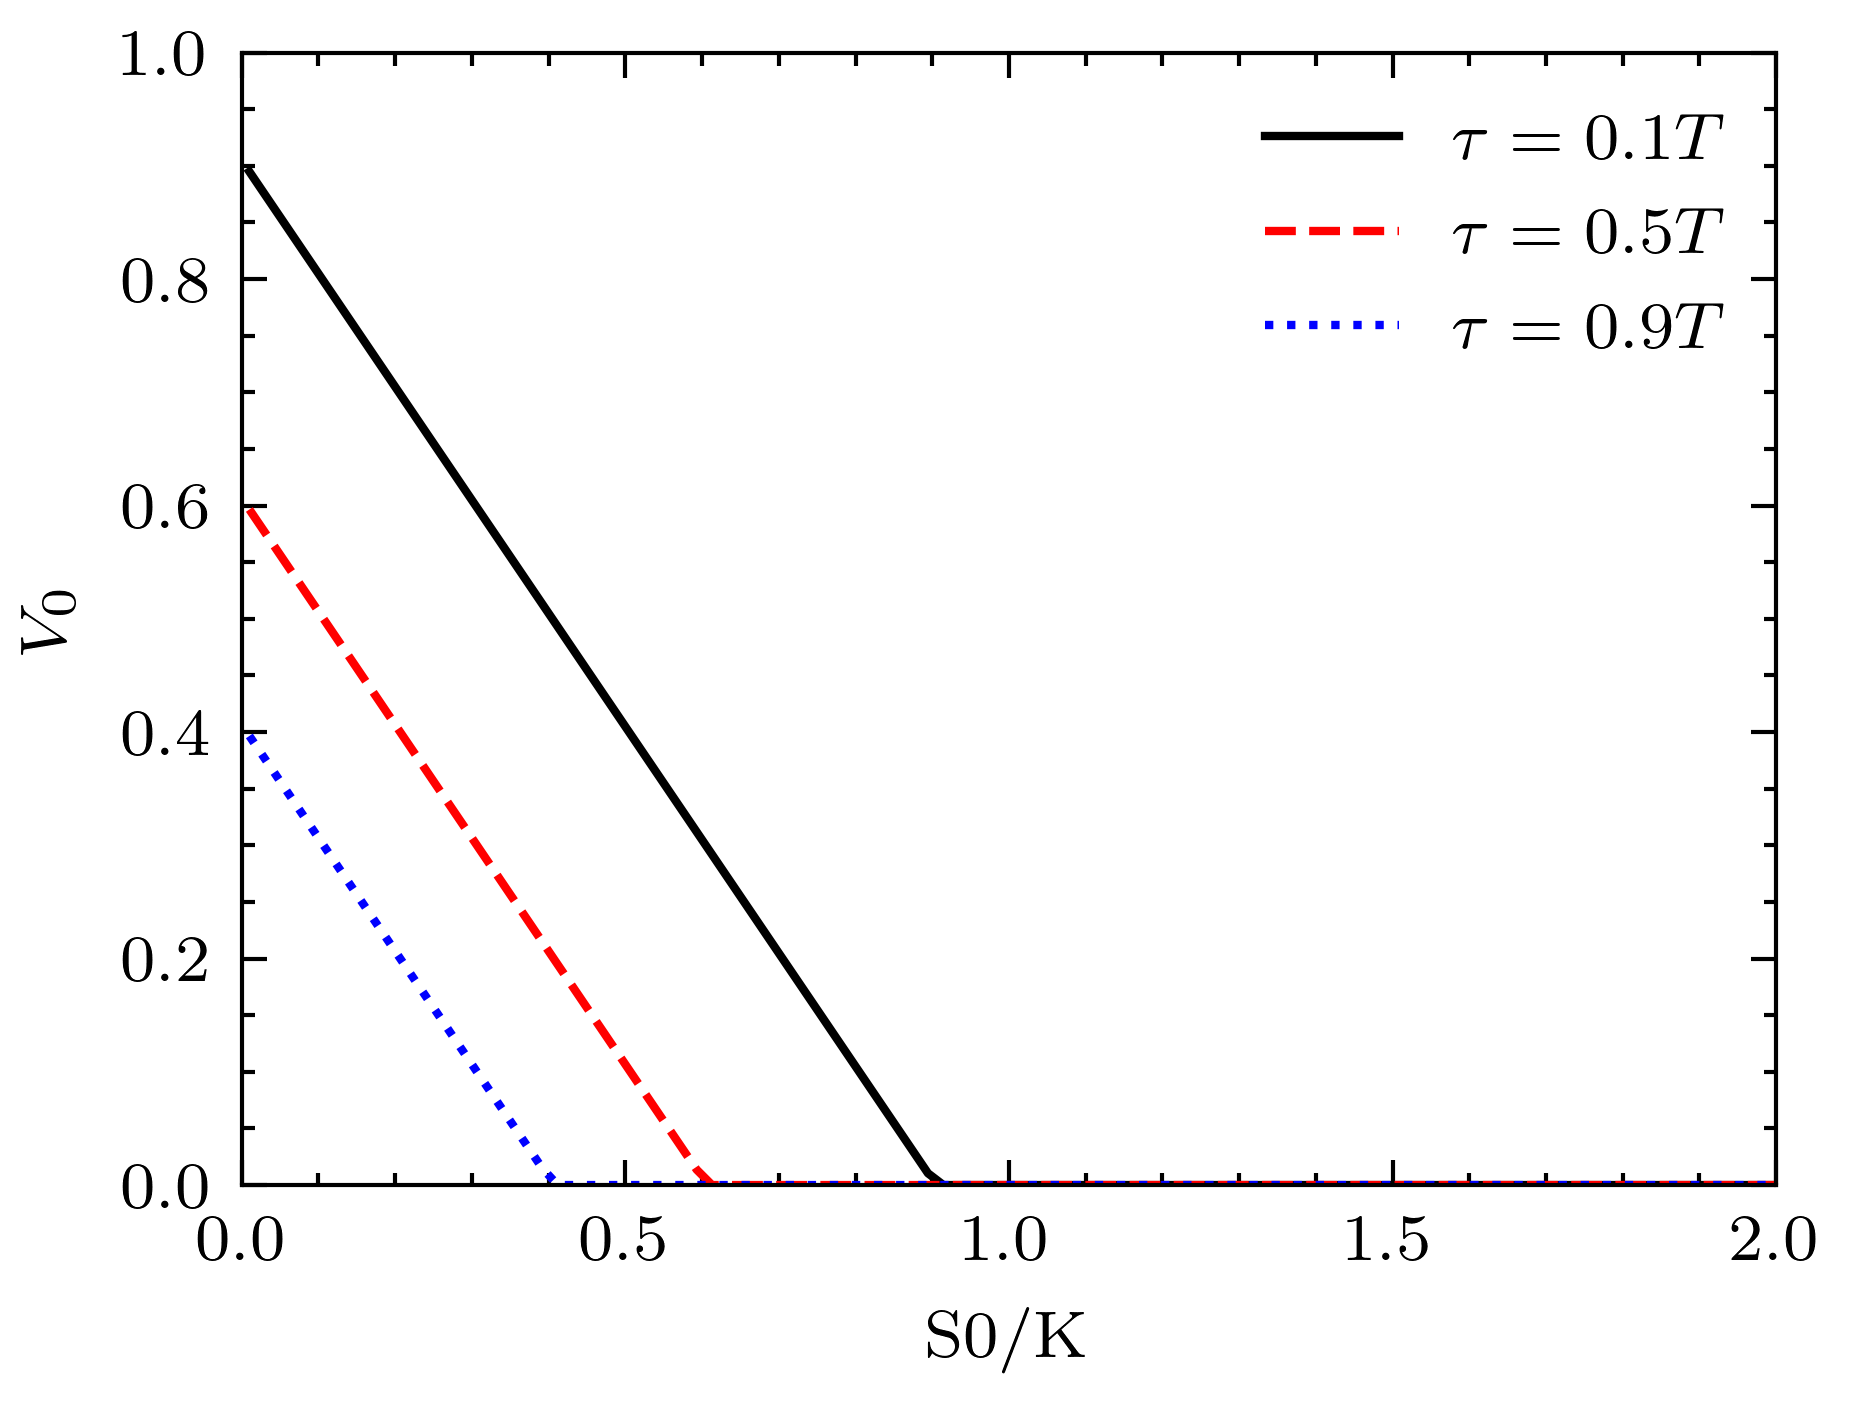

In [284]:
S0=np.linspace(0.01, 2,num=100)
K=1
r=0.1
o=0.3
T=10

with plt.style.context(['science','ieee']):
    V_0=[]
    for S in S0:
        V_0.append(Bermuda(S,K,T,0.1*T,r,sigma))
    plt.plot(S0,V_0,label=r'$\tau=0.1 T$')

    V_0=[]
    for S in S0:
        V_0.append(Bermuda(S,K,T,0.5*T,r,sigma))
    plt.plot(S0,V_0,label=r'$\tau=0.5 T$')

    V_0=[]
    for S in S0:
        V_0.append(Bermuda(S,K,T,0.9*T,r,sigma))
    plt.plot(S0,V_0,label=r'$\tau=0.9 T$')

    plt.ylim([0, 1])
    plt.xlim([0, 2])
    plt.ylabel('$V_0$')
    plt.xlabel('S0/K')
    plt.legend()
    plt.savefig('tau.png')
    plt.show()

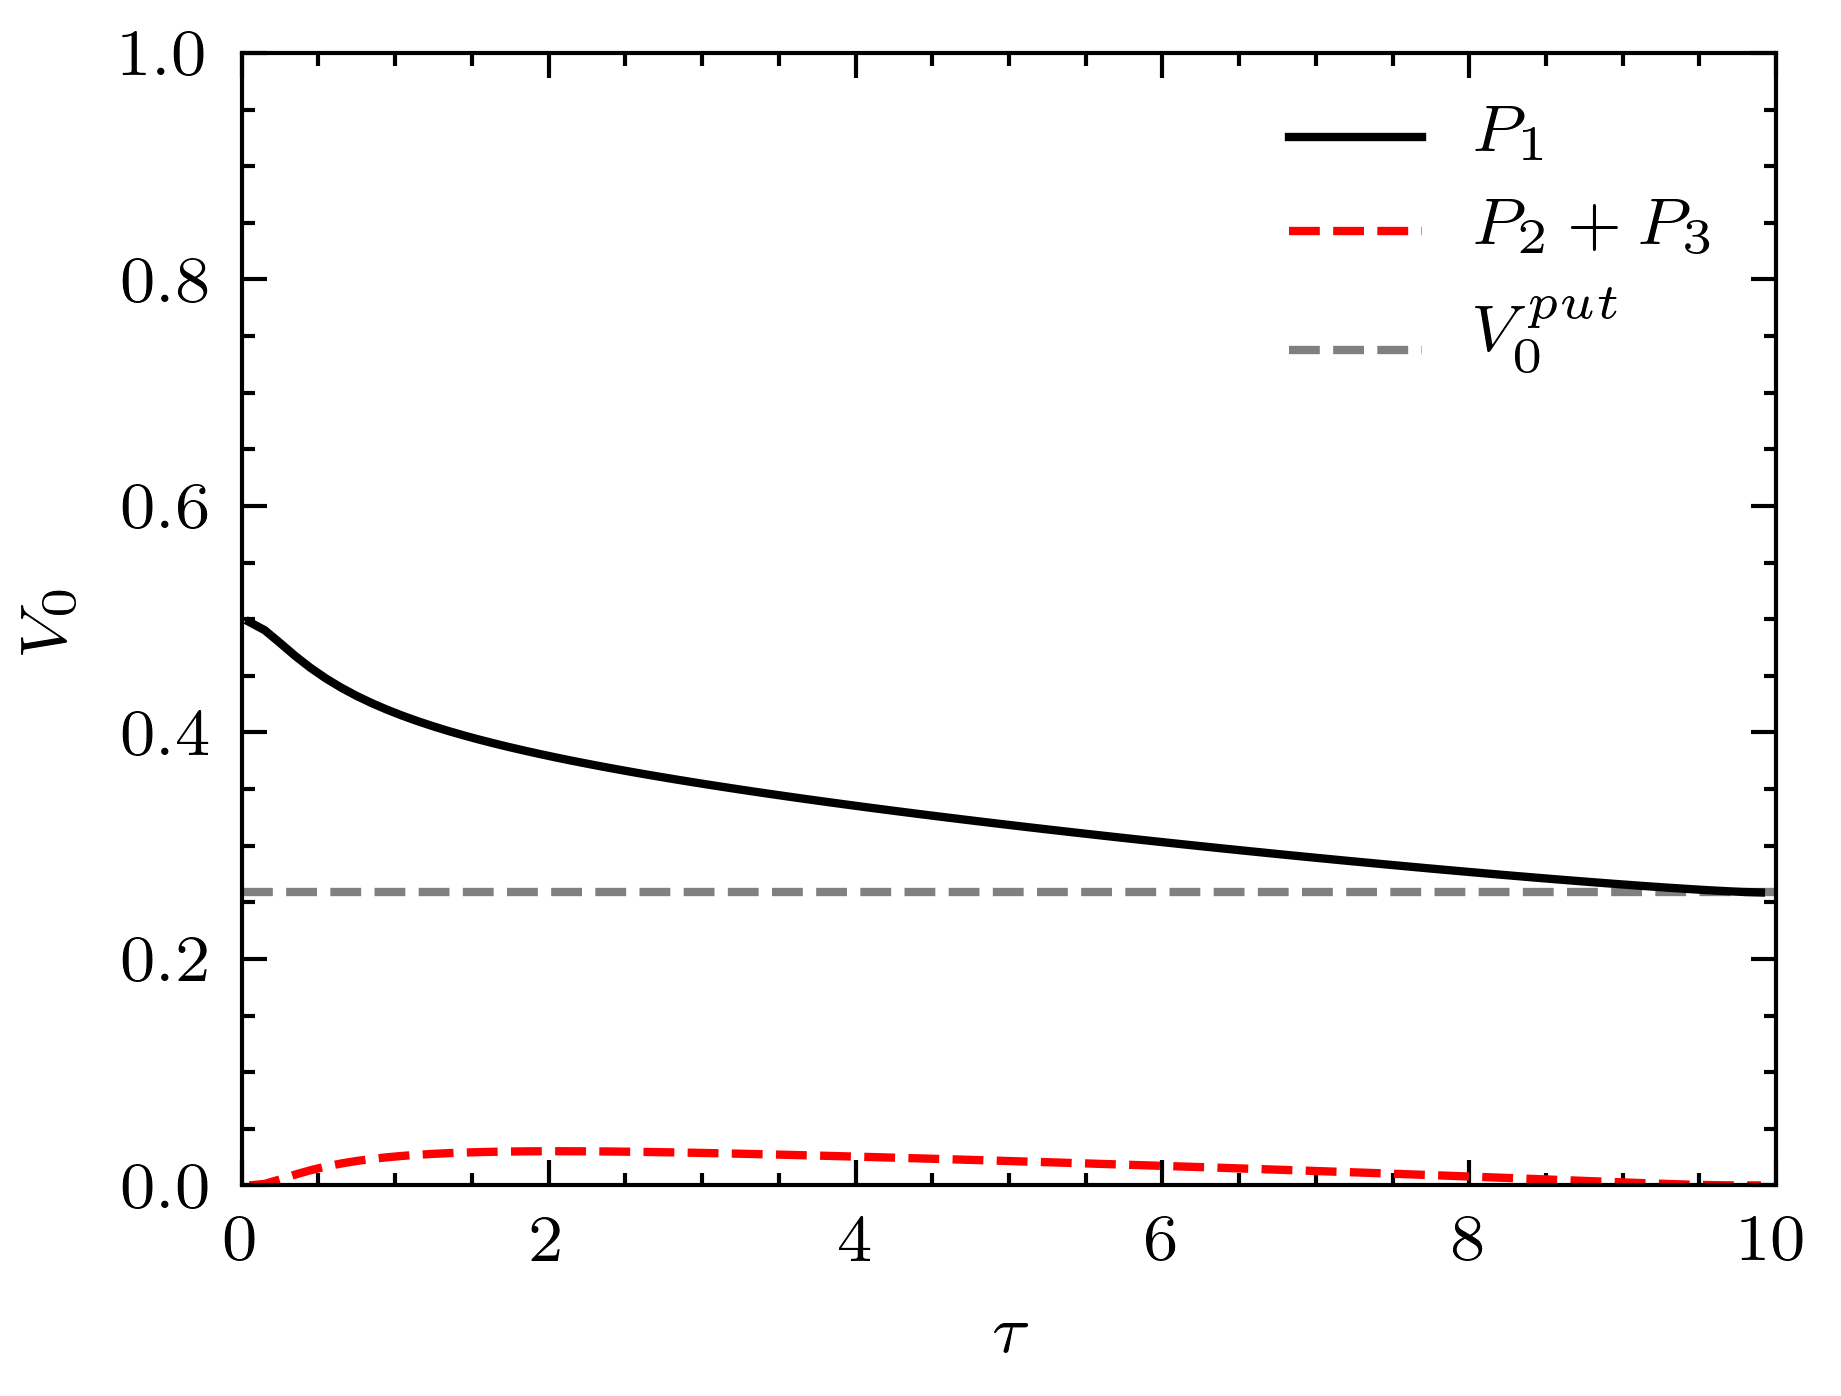

In [268]:
with plt.style.context(['science','ieee']):

    S0=0.5
    K=1
    r=0.05
    o=0.3
    T=10

    plt.hlines(P_BS(S0, K, r, o, T),0,T,label='$V_0^{put}$',linestyle='--',color='grey')

    t=np.linspace(0.05,0.99*T,num=100)
    V_0=[]
    for tau in t:
         V_0.append(Bermuda(S0,K,T,tau,r,o)[0])
    plt.plot(t,V_0,label=r'$P_1 $') 
    
    V_0=[]
    for tau in t:
         V_0.append(Bermuda(S0,K,T,tau,r,o)[1])
    plt.plot(t,V_0,label=r'$P_2 + P_3 $')       
    
       
    
    plt.ylim([0, 1])
    plt.xlim([0, T])
    plt.ylabel('$V_0$')
    plt.xlabel(r'$\tau$')
    plt.legend()
    plt.savefig('splits_put.png')
    plt.show()

# T

In [269]:
S0=np.linspace(0.01, 2,num=100)
K=1
r=0.05
o=0.3

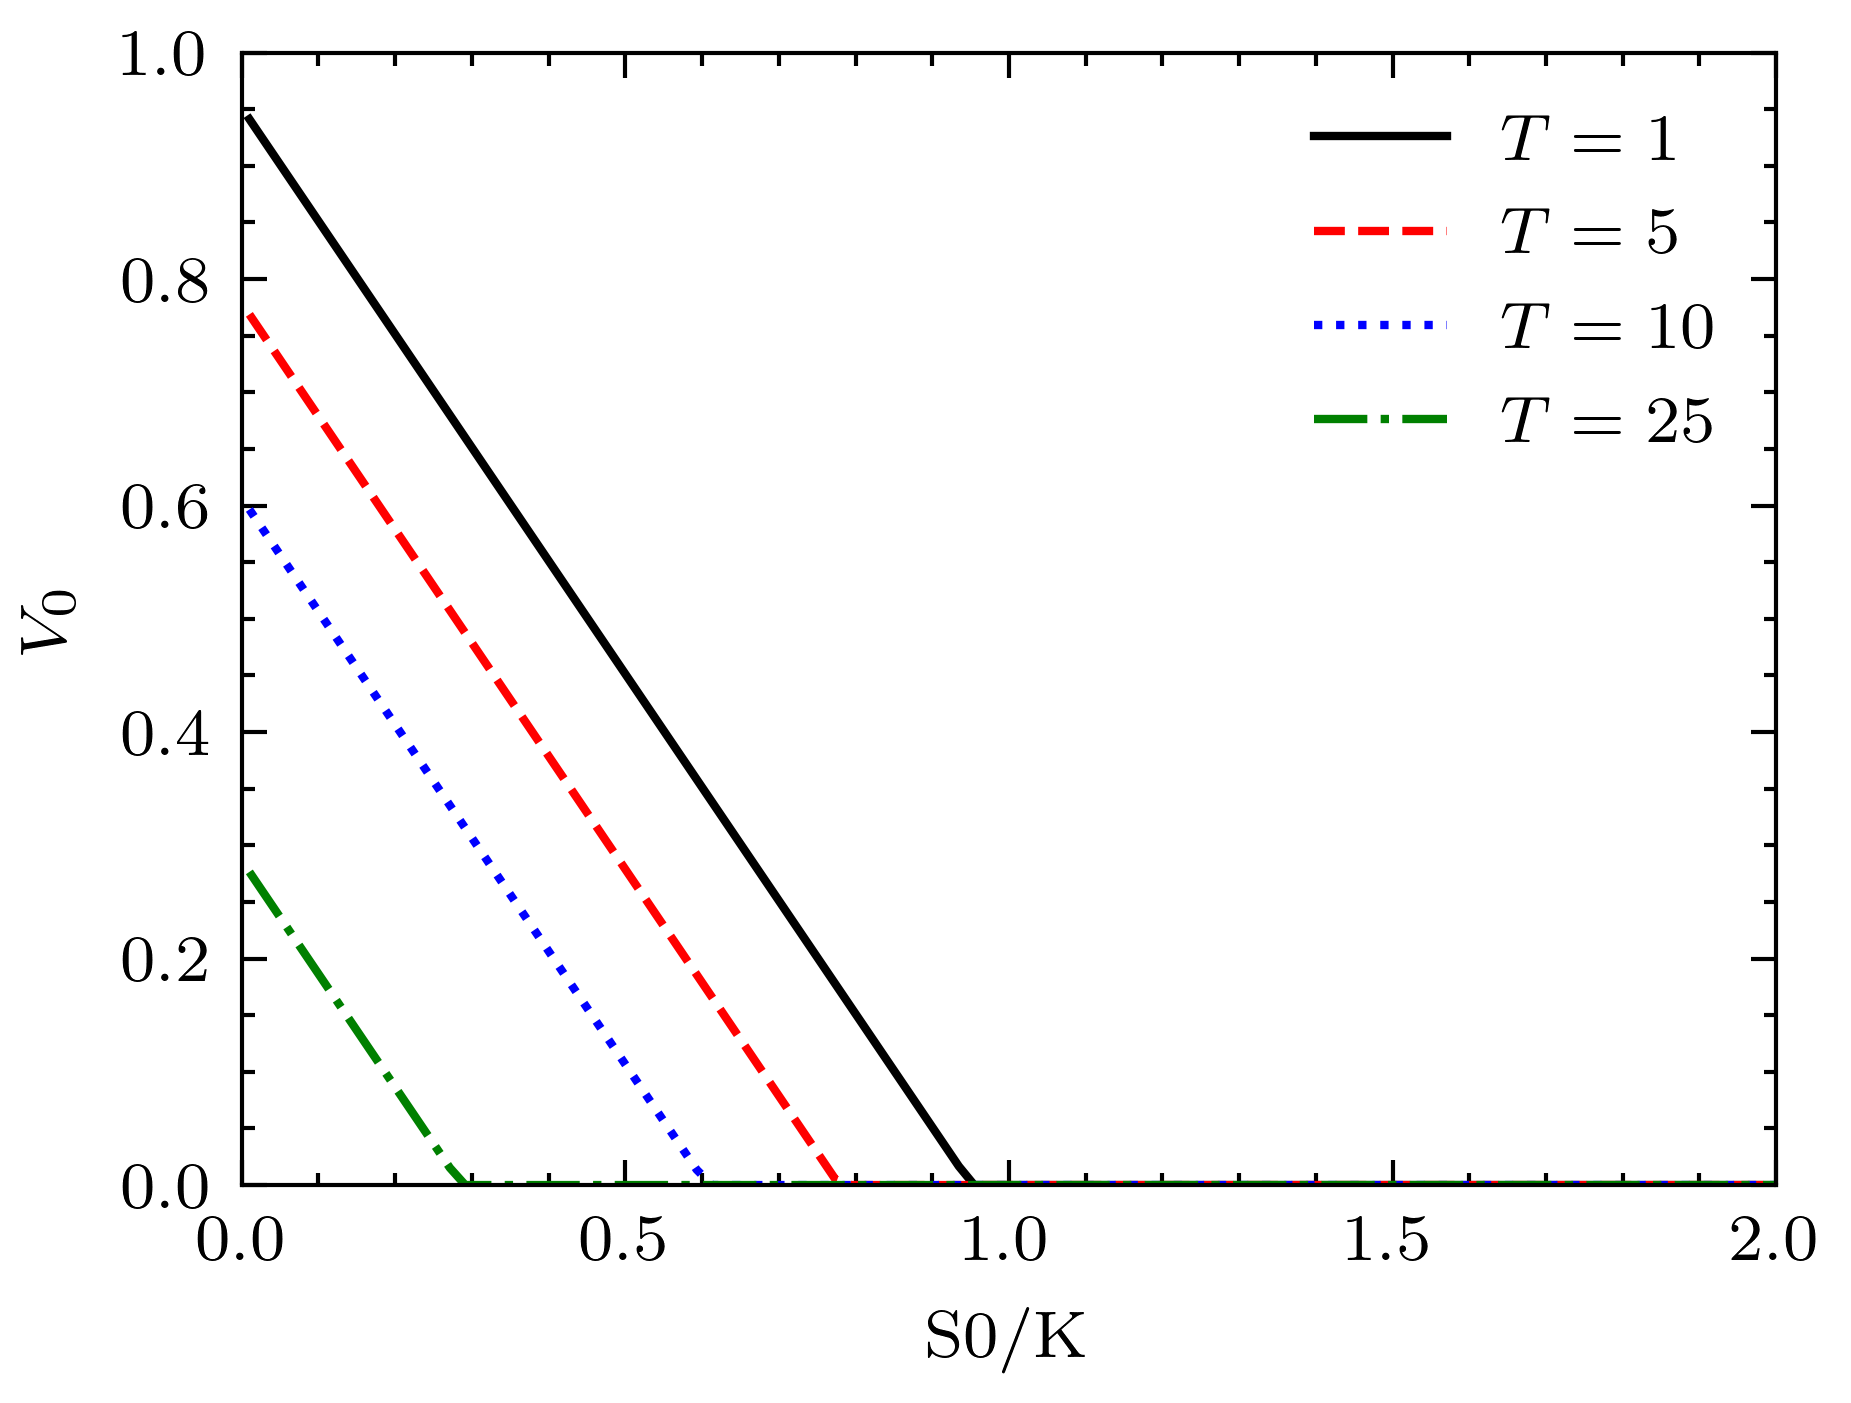

In [282]:
S0=np.linspace(0.01, 2,num=100)
K=1
r=0.1
sigma=0.001

with plt.style.context(['science','ieee']):
    V_0=[]
    for S in S0:
        V_0.append(Bermuda(S,K,1,.5,r,sigma))
    plt.plot(S0,V_0,label=r'$T=1$')

    V_0=[]
    for S in S0:
        V_0.append(Bermuda(S,K,5,2.5,r,sigma))
    plt.plot(S0,V_0,label=r'$T=5$')

    V_0=[]
    for S in S0:
        V_0.append(Bermuda(S,K,10,5,r,sigma))
    plt.plot(S0,V_0,label=r'$T=10$')

    V_0=[]
    for S in S0:
        V_0.append(Bermuda(S,K,25,25*0.5,r,sigma))
    plt.plot(S0,V_0,label=r'$T=25$')


    plt.ylim([0, 1])
    plt.xlim([0, 2])
    plt.ylabel('$V_0$')
    plt.xlabel('S0/K')
    plt.legend()
    plt.savefig('T.png')
    plt.show()